# Projeto Ciência de Dados - Previsão de Preços

- Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

![title](tabelas.png)

In [17]:
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)
print(tabela.info())

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Preco        7649 non-null   int64  
 1   TipoBarco    7649 non-null   int64  
 2   TipoVenda    7649 non-null   int64  
 3   Ano          7649 non-null   int64  
 4   Comprimento  7649 non-null   float64
 5   Largura      7649 non-null   float64
 6   Material     7649 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 418.4 KB
None


,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
Preco,1.000000,0.293137,0.041266,0.113385,0.578353,0.557621,-0.036476
TipoBarco,0.293137,1.000000,0.142893,-0.130147,0.541307,0.567662,0.083989
TipoVenda,0.041266,0.142893,1.000000,-0.195147,0.148886,0.163431,0.054972
Ano,0.113385,-0.130147,-0.195147,1.000000,-0.211120,-0.105949,-0.440310
Comprimento,0.578353,0.541307,0.148886,-0.211120,1.000000,0.874952,0.123300
Largura,0.557621,0.567662,0.163431,-0.105949,0.874952,1.000000,0.084715
Material,-0.036476,0.083989,0.054972,-0.440310,0.123300,0.084715,1.000000


,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


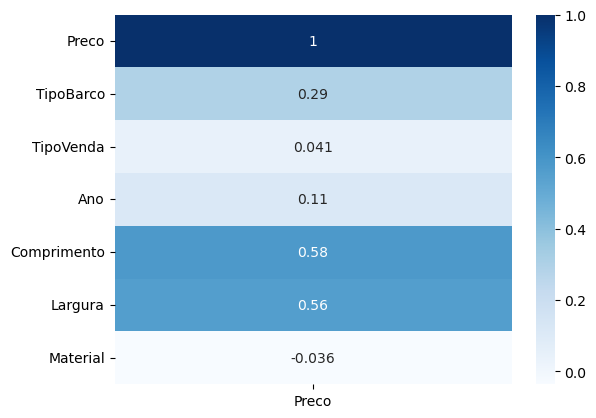

In [18]:
display(tabela.corr()) # correlação de todos os atributos (lembrando que tipos e material eram textos e foram transformados em número)
display(tabela.corr()[["Preco"]]) # correlação dos atributos com relação ao preço

# opcional
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr()[["Preco"]], annot=True, cmap="Blues")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

y = tabela["Preco"] # dados que eu quero prever: preço
x = tabela.drop("Preco", axis=1) # dados que eu quero usar para prever o preço, excluindo o preço

# separando dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) # separo 30% dos dados para treino, random_state=1 roda sempre a mesma base sem aleatoriedade 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar as inteligências artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar as inteligências artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [21]:
from sklearn.metrics import r2_score

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))  

0.4490324760735813
0.849590912268296


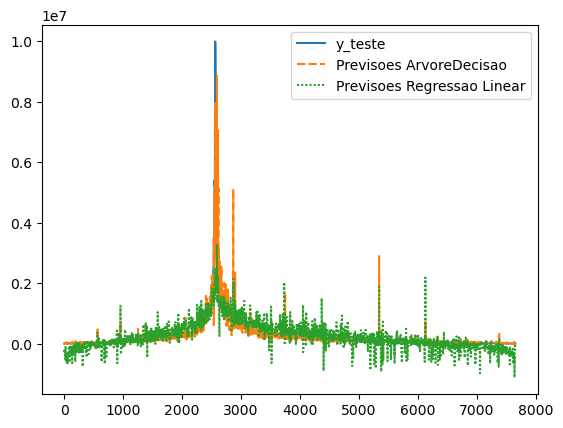

In [22]:
# visualizar previsões
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [23]:
nova_tabela = pd.read_csv("novos_barcos.csv") # barcos que eu quero prever o preço
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela) # uso o melhor modelo de previsão que eu consegui
print(previsao) # listo o preço desses novos_barcos

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5876.56407143  9655.79666667 17299.5       ]
